#### Roll:CS22B2020      <br>   Name : G.Sriram

#### 1.Train a single perceptron to learn two classes with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0, learning rate as 1. Show the calculation for each step. Plot all the samples and final decision boundary.


In [2]:
import numpy as np 
import pandas as pd

In [5]:
df = pd.DataFrame({
    'x1': [0.5, 1, 0.5, 1, 1.5, 4.5, 5, 4.5, 5.5],
    'x2': [3.0, 3.0, 2.5, 2.5, 2.5, 1, 1, 0.5, 0.5],
    'b' : [1,1,1,1,1,1,1,1,1],
    'class': [2, 2, 2, 2, 2, 1, 1, 1, 1]
})
df2 = pd.DataFrame({
    'x1': [0.5, 1, 0.5, 1, 1.5, 4.5, 5, 4.5, 5.5],
    'x2': [3.0, 3.0, 2.5, 2.5, 2.5, 1, 1, 0.5, 0.5],
    'b' : [1,1,1,1,1,1,1,1,1],
    'class': [2, 2, 2, 2, 2, 1, 1, 1, 1]
})

print(df)

    x1   x2  b  class
0  0.5  3.0  1      2
1  1.0  3.0  1      2
2  0.5  2.5  1      2
3  1.0  2.5  1      2
4  1.5  2.5  1      2
5  4.5  1.0  1      1
6  5.0  1.0  1      1
7  4.5  0.5  1      1
8  5.5  0.5  1      1


In [6]:
df.loc[df['class'] == 2, ['x1', 'x2','b']] *= -1
df

,x1,x2,b,class
0,-0.5,-3.0,-1,2
1,-1.0,-3.0,-1,2
2,-0.5,-2.5,-1,2
3,-1.0,-2.5,-1,2
4,-1.5,-2.5,-1,2
5,4.5,1.0,1,1
6,5.0,1.0,1,1
7,4.5,0.5,1,1
8,5.5,0.5,1,1


In [7]:
# Initializing 'a'
a = np.array([0,0,0])
a

array([0, 0, 0])

In [8]:
data = df.drop(columns=['class']).to_numpy()
print(data)

[[-0.5 -3.  -1. ]
 [-1.  -3.  -1. ]
 [-0.5 -2.5 -1. ]
 [-1.  -2.5 -1. ]
 [-1.5 -2.5 -1. ]
 [ 4.5  1.   1. ]
 [ 5.   1.   1. ]
 [ 4.5  0.5  1. ]
 [ 5.5  0.5  1. ]]


In [9]:
epochs = 22
for e in range(5):
    for i in range(data.shape[0]): 
        dot = np.dot(a.T,data[i])
        # if (dot <= 0 and df['class'][i] == 1) or (dot >0 and  df['class'][i] == 2):
        if dot<=0:
            a = a + (1 * data[i])

In [10]:
print(a)

[ 2.5 -4.5 -1. ]


In [11]:
for i in range(data.shape[0]):
    dot = np.dot(a.T,data[i])
    # if dot < 0 :
    #     print("2")
    # else:
    #     print("1")
    print(dot)

13.25
12.0
11.0
9.75
8.5
5.75
7.0
8.0
10.5


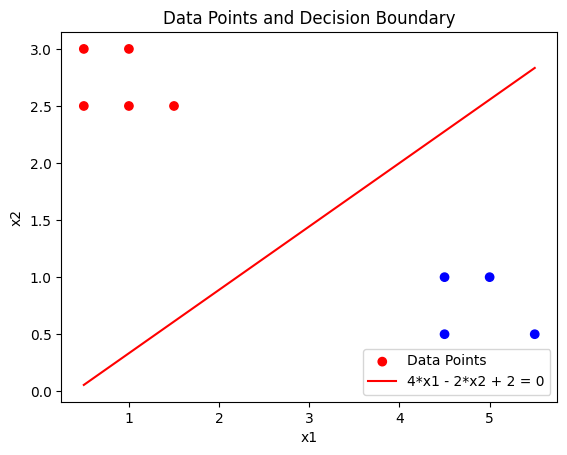

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Plot the data points
plt.scatter(df2['x1'], df2['x2'], c=df['class'], cmap='bwr', label='Data Points')

# Define the line equation 4*x1 - 2*x2 + 2 = 0
# Rearrange to x2 = (4/2)x1 + (2/2)
x1_values = np.linspace(min(df2['x1']), max(df2['x1']), 100)
x2_values = (a[0] / -a[1]) * x1_values + (a[2] / -a[1])

# Plot the line
plt.plot(x1_values, x2_values, color='red', label='4*x1 - 2*x2 + 2 = 0')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Points and Decision Boundary')

# Show the plot
plt.show()

### 2.Train a single perceptron to learn an AND gate with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0. Show the calculation for each step and also draw the decision boundary for each update

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

q2df = pd.DataFrame({
    'x1' : [1,1,0,0],
    'x2' : [1,0,1,0],
    'b'  : [1,1,1,1],
    'y'  : [1,0,0,0]
})

df2 = pd.DataFrame({
    'x1' : [1,1,0,0],
    'x2' : [1,0,1,0],
    'b'  : [1,1,1,1],
    'y'  : [1,0,0,0]
})
q2df

,x1,x2,b,y
0,1,1,1,1
1,1,0,1,0
2,0,1,1,0
3,0,0,1,0


In [3]:
q2df.loc[q2df['y'] == 1, ['x1', 'x2','b']] *= -1
q2df

,x1,x2,b,y
0,-1,-1,-1,1
1,1,0,1,0
2,0,1,1,0
3,0,0,1,0


In [4]:
# Initializing 'a'
a = np.array([0,0,0])
a

array([0, 0, 0])

In [5]:
data = q2df.drop(columns=['y']).to_numpy()
print(data)

[[-1 -1 -1]
 [ 1  0  1]
 [ 0  1  1]
 [ 0  0  1]]


In [12]:
epochs = 0
correct = 0
total = q2df.shape[0]
while(1):
    for i in range(data.shape[0]): 
        dot = np.dot(a.T,data[i])
        if dot<=0:
            a = a + (1 * data[i])
            correct = 0
        else:
            correct+=1
    if total == correct:
        break

In [13]:
a

array([-2, -3,  4], dtype=int64)

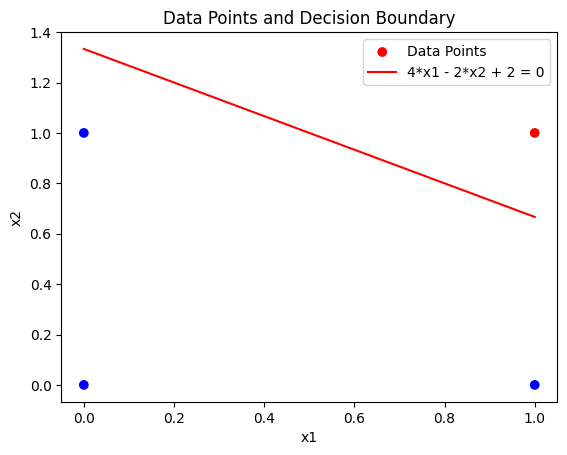

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Plot the data points
plt.scatter(df2['x1'], df2['x2'], c=df2['y'], cmap='bwr', label='Data Points')

# Define the line equation 4*x1 - 2*x2 + 2 = 0
# Rearrange to x2 = (4/2)x1 + (2/2)
x1_values = np.linspace(min(df2['x1']), max(df2['x1']), 100)
x2_values = (a[0] / -a[1]) * x1_values + (a[2] / -a[1])

# Plot the line
plt.plot(x1_values, x2_values, color='red', label='function')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Points and Decision Boundary')

# Show the plot
plt.show()

### 3.Train a single perceptron to learn the two classes in the following table.

where x1 and x2 are the inputs and ω is the target class. Assume that all the weights of the perceptron are initialized as 0 with learning rates 0.001, 0.01, 0.5 separately. Plot the samples and decision boundary. Also, tabulate the number of iterations required to converge the perception algorithm with these two learning rates. 

In [27]:
import numpy as np
import pandas as pd

In [28]:
# Data
data = {
    'x1': [2, -1, -1, 0, 1, -1, 0, 1, 0, -1],
    'x2': [2, -3, 2, -1, 3, -2, 1, -2, -1, 1],
    'b' : [1,1,1,1,1,1,1,1,1,1],
    'w': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)
q3df = pd.DataFrame(data)
# Display DataFrame
print(df)

   x1  x2  b  w
0   2   2  1  1
1  -1  -3  1  0
2  -1   2  1  1
3   0  -1  1  0
4   1   3  1  1
5  -1  -2  1  0
6   0   1  1  1
7   1  -2  1  0
8   0  -1  1  1
9  -1   1  1  1


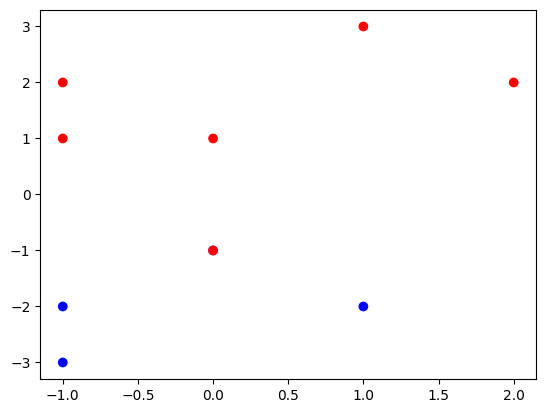

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'],df['x2'],c=df['w'],cmap='bwr',label='DataPoints')


In [30]:
q3df.loc[q3df['w'] == 1, ['x1', 'x2','b']] *= -1
q3df

,x1,x2,b,w
0,-2,-2,-1,1
1,-1,-3,1,0
2,1,-2,-1,1
3,0,-1,1,0
4,-1,-3,-1,1
5,-1,-2,1,0
6,0,-1,-1,1
7,1,-2,1,0
8,0,1,-1,1
9,1,-1,-1,1


In [45]:
# Initializing 'a'
a = np.array([0,0,0])
a

array([0, 0, 0])

In [46]:
data = q3df.drop(columns=['w']).to_numpy()
print(data)

[[-2 -2 -1]
 [-1 -3  1]
 [ 1 -2 -1]
 [ 0 -1  1]
 [-1 -3 -1]
 [-1 -2  1]
 [ 0 -1 -1]
 [ 1 -2  1]
 [ 0  1 -1]
 [ 1 -1 -1]]


In [47]:
epochs = 500
for e in range(epochs):
    for i in range(data.shape[0]): 
        dot = np.dot(a.T,data[i])
        if dot<=0:
            a = a + (1 * data[i])

In [48]:
# epochs = 0
# correct = 0
# total = q3df.shape[0]
# i = 0
# while(1):
#     epochs+=1
 
#     dot = np.dot(a.T,data[i])
#     if dot<=0:
#         a = a + (1 * data[i])
#         correct = 0
#     else:
#         correct+=1
#     if total == correct:
#         break
#     i = (i+1) % data.shape[0]

In [49]:
print("a : ",a)
print("epochs : ",)

a :  [-2 -1 -2]
epochs : 


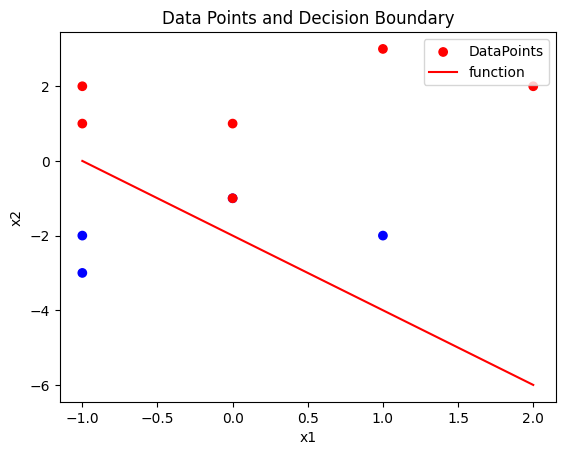

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Plot the data points
plt.scatter(df['x1'],df['x2'],c=df['w'],cmap='bwr',label='DataPoints')

# Define the line equation 4*x1 - 2*x2 + 2 = 0
# Rearrange to x2 = (4/2)x1 + (2/2)
x1_values = np.linspace(min(df['x1']), max(df['x1']), 100)
x2_values = (a[0] / -a[1]) * x1_values + (a[2] / -a[1])

# Plot the line
plt.plot(x1_values, x2_values, color='red', label='function')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Points and Decision Boundary')

# Show the plot
plt.show()

#### Q4
From the iris dataset, choose the ’petal length’, ’sepal width’ for “setosa” and  “virginica” flowers. Learn a decision boundary for the two features using a single perceptron. Assume that all the weights of the perceptron are initialized as 0 with the learning rate of 0.01. Output the final weight vector and plot the samples and the decision boundary.
[Note: Use iris.csv file in the attachments.]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
setosa_Dataset = data.loc[data['Species'] == 'Iris-setosa', ['PetalLengthCm', 'SepalWidthCm']]
virginica_Dataset = data.loc[data['Species'] == 'Iris-virginica', ['PetalLengthCm', 'SepalWidthCm']]

virginica_Dataset.head(3)

,PetalLengthCm,SepalWidthCm
100,6.0,3.3
101,5.1,2.7
102,5.9,3.0


In [5]:
setosa_Dataset.head(3)

,PetalLengthCm,SepalWidthCm
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2


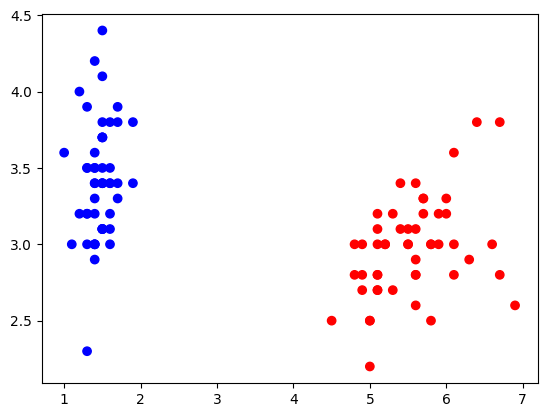

In [6]:
# For plotting points
setosa_Dataset['w'] = 0
virginica_Dataset['w'] = 1
plotdata = pd.concat([setosa_Dataset,virginica_Dataset])
plt.scatter(plotdata['PetalLengthCm'],plotdata['SepalWidthCm'],c=plotdata['w'],cmap='bwr',label='DataPoints')

In [7]:
setosa_Dataset['bias'] = 1

In [8]:
setosa_Dataset[['PetalLengthCm','SepalWidthCm','bias']] *= -1

In [9]:
setosa_Dataset.head(3)

,PetalLengthCm,SepalWidthCm,w,bias
0,-1.4,-3.5,0,-1
1,-1.4,-3.0,0,-1
2,-1.3,-3.2,0,-1


In [10]:
virginica_Dataset['bias'] = 1
virginica_Dataset.head(3)

,PetalLengthCm,SepalWidthCm,w,bias
100,6.0,3.3,1,1
101,5.1,2.7,1,1
102,5.9,3.0,1,1


In [11]:
finaldataset = pd.concat([setosa_Dataset,virginica_Dataset])

In [12]:
finaldataset.head(3)

,PetalLengthCm,SepalWidthCm,w,bias
0,-1.4,-3.5,0,-1
1,-1.4,-3.0,0,-1
2,-1.3,-3.2,0,-1


In [13]:
finaldataset.tail(3)

,PetalLengthCm,SepalWidthCm,w,bias
147,5.2,3.0,1,1
148,5.4,3.4,1,1
149,5.1,3.0,1,1


In [15]:
# Initializing 'a'
a = np.array([0,0,0])
data = finaldataset.drop(columns=['w']).to_numpy()
data

array([[-1.4, -3.5, -1. ],
       [-1.4, -3. , -1. ],
       [-1.3, -3.2, -1. ],
       [-1.5, -3.1, -1. ],
       [-1.4, -3.6, -1. ],
       [-1.7, -3.9, -1. ],
       [-1.4, -3.4, -1. ],
       [-1.5, -3.4, -1. ],
       [-1.4, -2.9, -1. ],
       [-1.5, -3.1, -1. ],
       [-1.5, -3.7, -1. ],
       [-1.6, -3.4, -1. ],
       [-1.4, -3. , -1. ],
       [-1.1, -3. , -1. ],
       [-1.2, -4. , -1. ],
       [-1.5, -4.4, -1. ],
       [-1.3, -3.9, -1. ],
       [-1.4, -3.5, -1. ],
       [-1.7, -3.8, -1. ],
       [-1.5, -3.8, -1. ],
       [-1.7, -3.4, -1. ],
       [-1.5, -3.7, -1. ],
       [-1. , -3.6, -1. ],
       [-1.7, -3.3, -1. ],
       [-1.9, -3.4, -1. ],
       [-1.6, -3. , -1. ],
       [-1.6, -3.4, -1. ],
       [-1.5, -3.5, -1. ],
       [-1.4, -3.4, -1. ],
       [-1.6, -3.2, -1. ],
       [-1.6, -3.1, -1. ],
       [-1.5, -3.4, -1. ],
       [-1.5, -4.1, -1. ],
       [-1.4, -4.2, -1. ],
       [-1.5, -3.1, -1. ],
       [-1.2, -3.2, -1. ],
       [-1.3, -3.5, -1. ],
 

In [16]:

# training

epochs = 5000
for e in range(epochs):
    for i in range(data.shape[0]): 
        dot = np.dot(a.T,data[i])
        if dot<=0:
            a = a + (0.1 * data[i])
            
# epochs = 0
# correct = 0
# total = q3df.shape[0]
# i = 0
# while(1):
#     epochs+=1
 
#     dot = np.dot(a.T,data[i])
#     if dot<=0:
#         a = a + (1 * data[i])
#         correct = 0
#     else:
#         correct+=1
#     if total == correct:
#         break
#     i = (i+1) % data.shape[0]

print("a : ",a)
# print("epochs : ",)


a :  [ 0.32 -0.37 -0.1 ]


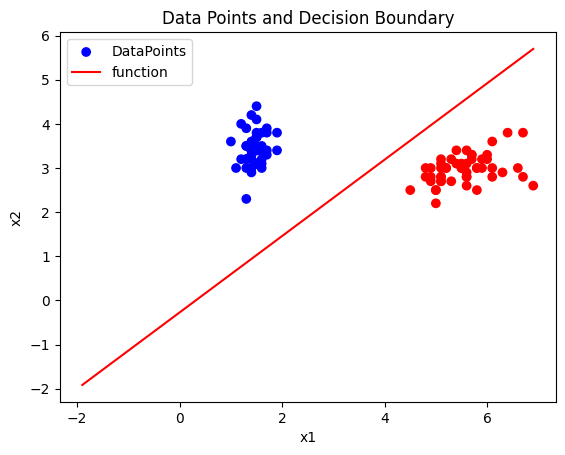

In [18]:

# Plot the data points
plt.scatter(plotdata['PetalLengthCm'],plotdata['SepalWidthCm'],c=plotdata['w'],cmap='bwr',label='DataPoints')

# Define the line equation 4*x1 - 2*x2 + 2 = 0
# Rearrange to x2 = (4/2)x1 + (2/2)
x1_values = np.linspace(min(finaldataset['PetalLengthCm']), max(finaldataset['PetalLengthCm']), 100)
x2_values = (a[0] / -a[1]) * x1_values + (a[2] / -a[1])

# Plot the line
plt.plot(x1_values, x2_values, color='red', label='function')

# Add labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Data Points and Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Points and Decision Boundary')

# Show the plot
plt.show()